# Chapter 5 - Time-series Stock Data

In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
import quandl

## Fetching multiple historical stock data

In [5]:
"""Microsoft - Technology Sector: Our stock to be compared"""
start = datetime.date(2014,1,1)
end = datetime.date(2016,12,31)
msft = web.DataReader("WIKI/MSFT", "quandl", start, end)
msft[:5]

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2016-12-30,62.96,62.99,62.03,62.14,25579908.0,0.0,1.0,61.590878,61.620226,60.681102,60.788710,25579908.0
2016-12-29,62.86,63.20,62.73,62.90,10250582.0,0.0,1.0,61.493053,61.825659,61.365880,61.532183,10250582.0
2016-12-28,63.40,63.40,62.83,62.99,14653348.0,0.0,1.0,62.021310,62.021310,61.463705,61.620226,14653348.0
2016-12-27,63.21,64.07,63.21,63.28,11763173.0,0.0,1.0,61.835442,62.676740,61.835442,61.903920,11763173.0
2016-12-23,63.45,63.54,62.80,63.24,12403819.0,0.0,1.0,62.070223,62.158266,61.434358,61.864790,12403819.0


In [6]:
"""Stocks to compare our stock with"""
#Pull historical quotes and store them all in a single DataFrame used as a source for various data analysis

#get the quotes for a series of tickers map apply the get quotes for the tickers, and then concat them in single df
def get(tickers, start, end):
    def data(ticker):
        return web.DataReader(ticker, "quandl", start, end)
    datas = map(data, tickers)
    return pd.concat(datas, keys = tickers, names = ["Ticker", "Date"])

In [7]:
#Load the data for all our stocks
tickers = ["WIKI/AAPL", "WIKI/MSFT", "WIKI/GE", "WIKI/IBM", "WIKI/SAVE", "WIKI/DAL", "WIKI/UAL", "WIKI/PEP", "WIKI/KO"]
all_data = get(tickers, start, end)
all_data[:5]

Open      High     Low   Close      Volume  \
Ticker    Date                                                       
WIKI/AAPL 2016-12-30  116.65  117.2000  115.43  115.82  30586265.0   
          2016-12-29  116.45  117.1095  116.40  116.73  15039519.0   
          2016-12-28  117.52  118.0166  116.20  116.76  20905892.0   
          2016-12-27  116.52  117.8000  116.49  117.26  18296855.0   
          2016-12-23  115.59  116.5200  115.59  116.52  14249484.0   

                      ExDividend  SplitRatio     AdjOpen     AdjHigh  \
Ticker    Date                                                         
WIKI/AAPL 2016-12-30         0.0         1.0  115.209202  115.752409   
          2016-12-29         0.0         1.0  115.011672  115.663027   
          2016-12-28         0.0         1.0  116.068456  116.558923   
          2016-12-27         0.0         1.0  115.080808  116.344998   
          2016-12-23         0.0         1.0  114.162295  115.080808   

                          AdjLow    AdjClose   AdjVolume  
Ticker    Date                                            
WIKI/AAPL 2016-12-30  114.004271  114.389454  30586265.0  
          2016-12-29  114.962290  115.288214  15039519.0  
          2016-12-28  114.764760  115.317843  20905892.0  
          2016-12-27  115.051178  115.811668  18296855.0  
          2016-12-23  114.162295  115.080808  14249484.0

## Fetching index data

In [6]:
"""Get the S&P500 index data"""
sp_500 = web.DataReader("SPY", "iex", start, end)
sp_500[:5]

5y


,open,high,low,close,volume
date,,,,,
2014-01-02,168.3602,168.4425,166.9875,167.3902,119636836
2014-01-03,167.6555,168.0124,167.1248,167.3581,81390502
2014-01-06,167.8935,167.9758,166.6215,166.8777,108028139
2014-01-07,167.5457,168.1863,167.4176,167.9026,86144169
2014-01-08,167.8752,168.2229,167.3627,167.9392,96582234


## Plotting Closing Prices

##### Extract the adjusted close value for each stock into its own pandas object. Reset the index to move the dates into a column so that we can pivot Date into index and each ticker value into a column

In [7]:
#Reset index to make everything columns
just_closing_prices = all_data[["AdjClose"]].reset_index()
just_closing_prices[:5]

,Ticker,Date,AdjClose
0,WIKI/AAPL,2016-12-30,114.389454
1,WIKI/AAPL,2016-12-29,115.288214
2,WIKI/AAPL,2016-12-28,115.317843
3,WIKI/AAPL,2016-12-27,115.811668
4,WIKI/AAPL,2016-12-23,115.080808


In [8]:
#Pivot on index, columns, values
daily_close_px = just_closing_prices.pivot("Date", "Ticker", "AdjClose")
daily_close_px[:5]

Ticker,WIKI/AAPL,WIKI/DAL,WIKI/GE,WIKI/IBM,WIKI/KO,WIKI/MSFT,WIKI/PEP,WIKI/SAVE,WIKI/UAL
Date,,,,,,,,,
2014-01-02,73.523423,26.382325,24.266002,162.670896,36.092891,33.532800,73.805440,45.65,37.73
2014-01-03,71.908415,27.839544,24.248354,163.644133,35.915356,33.307202,73.931296,47.58,39.95
2014-01-06,72.300536,27.896690,24.054226,163.082988,35.746698,32.603338,73.967255,46.00,39.36
2014-01-07,71.783135,27.410950,24.080698,166.335879,35.853219,32.856007,75.046019,46.42,38.69
2014-01-08,72.238063,28.382429,24.010106,164.810264,35.453765,32.269454,74.830266,46.70,41.02


##### Plot a single stock's closing price by selecting the specific column and calling .plot()

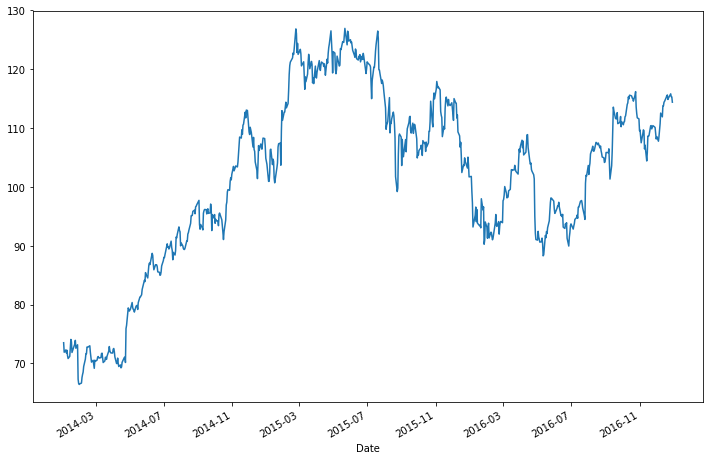

In [9]:
aapl_plot = daily_close_px["WIKI/AAPL"].plot(figsize=(12,8))

##### Plot all the closing prices against each other

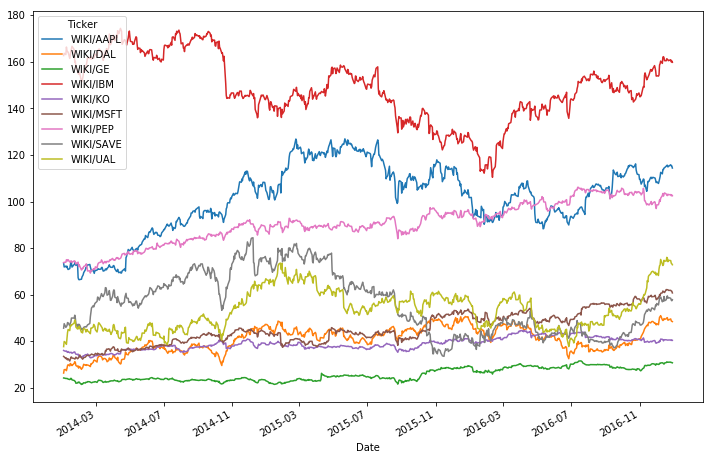

In [10]:
plot_all = daily_close_px.plot(figsize = (12, 8))

## Plotting Volume-Series Data

##### Stock trading volume is plotted with bar charts --> .bar()

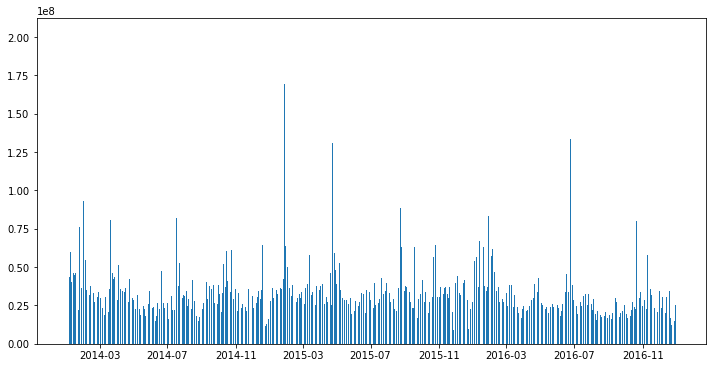

In [11]:
#Locate Microsoft from the volume of all the stock data
msftV = all_data.Volume.loc["WIKI/MSFT"]
#Plot a bar chart with x-axis = msftV.index = date, y-axis = msftV = Volume
plt.bar(msftV.index, msftV)
#gcf = get a reference to the current figure (created)
plt.gcf().set_size_inches(12,6)

## Combined Price and Volume

##### Plot a stock trading volume relative to its closing price.

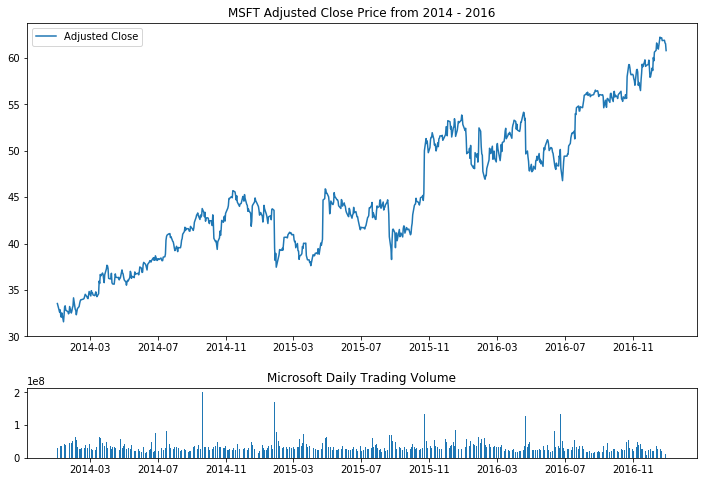

In [12]:
"""Top"""
#.subplot2grid = create an axis at a specific location inside a regular grid
#elements => shape, location, rowspan(n of rows spanning to the right), colspan (n col spanning downwards)
top = plt.subplot2grid((4,4), (0,0), rowspan = 3, colspan = 4)
top.plot(daily_close_px.index, daily_close_px["WIKI/MSFT"], label="Adjusted Close")

"""Labels and Widgets"""
#Top Title label
plt.title("MSFT Adjusted Close Price from 2014 - 2016")
#Legend widget
plt.legend(loc=2)

"""Bottom"""
bottom = plt.subplot2grid((4,4), (3, 0), rowspan=1, colspan=4)
#bottom bar chart
bottom.bar(msftV.index, msftV)
#bottom title
plt.title("Microsoft Daily Trading Volume")

"""Fine-tuning the plots"""
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)


## Plotting Candlesticks

##### OHLC plots = candlestick charts which illustrate movements in the price of a financial instrument over time. 

##### High - Low = Thin vertical line for each unit of time that represents the range of the price during that unit of time.

##### Open - Close = Thicker bar overlying thin one that represents the spacing between the open and close prices.

In [13]:
"""Step 1) Select the subset of data for MSFT in Dec 15 from df(adjclose)."""
#Since Ticker and Date have been pivoted into the index, we can use chained .loc to:
# a) retrieve ONLY the rows for MSFT
# b) slice using a partial date specification to extract ONLY rows for 2014-12

subset = all_data.loc["WIKI/MSFT"].loc["2014-12"].reset_index()
subset[:5]

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2014-12-31,46.73,47.44,46.45,46.45,21552450.0,0.0,1.0,43.316504,43.974640,43.056957,43.056957,21552450.0
1,2014-12-30,47.44,47.62,46.84,47.02,16384692.0,0.0,1.0,43.974640,44.141492,43.418469,43.585320,16384692.0
2,2014-12-29,47.70,47.78,47.26,47.45,14439518.0,0.0,1.0,44.215648,44.289804,43.807789,43.983910,14439518.0
3,2014-12-26,48.41,48.41,47.82,47.88,13197817.0,0.0,1.0,44.873784,44.873784,44.326882,44.382499,13197817.0
4,2014-12-24,48.64,48.64,48.08,48.14,11442790.0,0.0,1.0,45.086984,45.086984,44.567890,44.623507,11442790.0


In [14]:
#Reset the index to move Date into a column because it need to be such for the charting function.
#Need to convert the values in our Date column into the representation needed and add them as a new column to data.

"""Date Formatter Representation ==> floating point representing the n of days since the 0001-01-01 univesal time + 1

a) Convert pandas dates to pydatetime
b) Use matplotlib.date2num to convert for matplotlib label formatter"""

#use .apply() method of DF to convert each value in Date column and add it as new column date_num

import matplotlib.dates as mdates
subset["date_num"] = subset["Date"].apply(lambda date: mdates.date2num(date.to_pydatetime()))
subset[:5]

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,date_num
0,2014-12-31,46.73,47.44,46.45,46.45,21552450.0,0.0,1.0,43.316504,43.974640,43.056957,43.056957,21552450.0,735598.0
1,2014-12-30,47.44,47.62,46.84,47.02,16384692.0,0.0,1.0,43.974640,44.141492,43.418469,43.585320,16384692.0,735597.0
2,2014-12-29,47.70,47.78,47.26,47.45,14439518.0,0.0,1.0,44.215648,44.289804,43.807789,43.983910,14439518.0,735596.0
3,2014-12-26,48.41,48.41,47.82,47.88,13197817.0,0.0,1.0,44.873784,44.873784,44.326882,44.382499,13197817.0,735593.0
4,2014-12-24,48.64,48.64,48.08,48.14,11442790.0,0.0,1.0,45.086984,45.086984,44.567890,44.623507,11442790.0,735591.0


In [15]:
"""candlestick_ohlc doesn't know how to work with df objects so must convert to another format.

-> Provide the function with a list of tuples where each tuple consists of date_num,o,h,l,c"""
#get the tuple for each value in date_num and OHLC
subset_as_tuples = [tuple(x) for x in subset[["date_num", "Open", "High", "Low", "Close"]].values]
subset_as_tuples

[(735598.0, 46.73, 47.44, 46.45, 46.45),
 (735597.0, 47.44, 47.62, 46.84, 47.02),
 (735596.0, 47.7, 47.78, 47.26, 47.45),
 (735593.0, 48.41, 48.41, 47.82, 47.88),
 (735591.0, 48.64, 48.64, 48.08, 48.14),
 (735590.0, 48.37, 48.8, 48.13, 48.45),
 (735589.0, 47.78, 48.12, 47.71, 47.98),
 (735586.0, 47.63, 48.1, 47.17, 47.66),
 (735585.0, 46.58, 47.52, 46.3386, 47.52),
 (735584.0, 45.05, 45.945, 44.9, 45.74),
 (735583.0, 45.9, 46.34, 45.13, 45.16),
 (735582.0, 47.2, 47.67, 46.55, 46.67),
 (735579.0, 46.78, 47.73, 46.67, 46.95),
 (735578.0, 47.08, 47.74, 46.68, 47.17),
 (735577.0, 47.58, 47.66, 46.7001, 46.9),
 (735576.0, 47.11, 47.92, 47.05, 47.59),
 (735575.0, 48.26, 48.35, 47.445, 47.695),
 (735572.0, 48.82, 48.97, 48.38, 48.42),
 (735571.0, 48.39, 49.06, 48.2, 48.84),
 (735570.0, 48.44, 48.5, 47.805, 48.08),
 (735569.0, 48.84, 49.05, 48.2, 48.46),
 (735568.0, 47.88, 48.78, 47.71, 48.62)]

In [16]:
"""1. How to format the x-axis:
            --> create an instance of DateFormatter and configure it to format the dates as we want."""
from matplotlib.dates import DateFormatter
week_formatter = DateFormatter("%b %d") #e.g. Jan 12

"""2. How to select which data points on the x-axis we want to label:
            --> create an instance of WeekdayLocator and initialize it with the constant MONDAY"""
from matplotlib.dates import (WeekdayLocator, MONDAY)
mondays = WeekdayLocator(MONDAY) #major ticks on the mondays

([<matplotlib.lines.Line2D at 0x11ccf2748>,
  <matplotlib.patches.Rectangle at 0x11d0f69e8>])

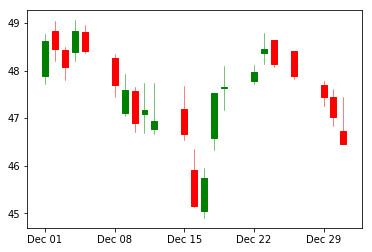

In [17]:
"""Plot the chart"""
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()

ax.xaxis.set_major_locator(mondays) #accept a locator instance
ax.xaxis.set_major_formatter(week_formatter) #accepts a formatter instance

from matplotlib.finance import candlestick_ohlc
candlestick_ohlc(ax, subset_as_tuples, width=0.6, colorup="g",colordown="r")


# Fundamental Financial Calculations

##### Analyses and data conversions to analyze the performance of hisotircal stock quote.

## Calculating Simple Daily Percentage Change

##### Amount of percentage change in the value of a stock over a single day of trading: 

 $r_t = \frac{p_t}{p_{t-1}} - 1$

In [18]:
"""Method 1 - iloc[row][column]"""
#Pt-1 ==> row[0] so first date
AAPL_pt0 = daily_close_px.iloc[0]["WIKI/AAPL"] 
#Pt ==> row[1] so first date + 1
AAPL_pt1 = daily_close_px.iloc[1]["WIKI/AAPL"]
#Returns
r_t1 = (AAPL_pt1/AAPL_pt0) - 1
AAPL_pt0, AAPL_pt1, r_t1

(73.523423281972, 71.908414888148, -0.02196590313307678)

In [19]:
"""Method 2 - Slicing across an entire DataFrame:"""
#Divide a slice of the df that excludes the first row by the values slice to exclude the last value
dpc_1 = daily_close_px.iloc[1:] / daily_close_px.iloc[:-1].values - 1 #.values bc we want to exclude the date
dpc_1.loc[:,"WIKI/AAPL":"WIKI/DAL"][:5]

#--- Reasoning Behind it ---

#We are dividing a slice of the values in the df by a slice of values in a 2D Array with no alignment bc no index
# --> When dividing pandas obj / non-pandas obj:
#           Pandas matches DF row/col to Array row/col 

Ticker,WIKI/AAPL,WIKI/DAL
Date,,
2014-01-03,-0.021966,0.055235
2014-01-06,0.005453,0.002053
2014-01-07,-0.007156,-0.017412
2014-01-08,0.006338,0.035441
2014-01-09,-0.012772,0.042282


In [20]:
"""Method 3 - Shifting the values, using lagged variables"""

dpc_2 = daily_close_px /daily_close_px.shift(1) - 1
dpc_2.iloc[:,0:2][:5]

Ticker,WIKI/AAPL,WIKI/DAL
Date,,
2014-01-02,NaN,NaN
2014-01-03,-0.021966,0.055235
2014-01-06,0.005453,0.002053
2014-01-07,-0.007156,-0.017412
2014-01-08,0.006338,0.035441


In [21]:
"""Method 4 = EASIEST = built in .pct_change()"""

daily_pct_change = daily_close_px.pct_change()

#Set NaN values = 0
daily_pct_change.fillna(0, inplace = True)

daily_pct_change.iloc[:,0:5][:5]


Ticker,WIKI/AAPL,WIKI/DAL,WIKI/GE,WIKI/IBM,WIKI/KO
Date,,,,,
2014-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2014-01-03,-0.021966,0.055235,-0.000727,0.005983,-0.004919
2014-01-06,0.005453,0.002053,-0.008006,-0.003429,-0.004696
2014-01-07,-0.007156,-0.017412,0.001101,0.019946,0.002980
2014-01-08,0.006338,0.035441,-0.002931,-0.009172,-0.011141


## Calculating Simple Daily Cumulative Returns

#### To determine the value of an investment at regular intervals after investment:

$i_t = (1+ r_t) * i_{t-1}, i_0 = 1$

In [22]:
#it-1 = the cumultaive product of all previous values
# use the .cumprod()

cum_daily_return =(1 + daily_pct_change).cumprod() - 1
cum_daily_return.iloc[:,:5][:5]

Ticker,WIKI/AAPL,WIKI/DAL,WIKI/GE,WIKI/IBM,WIKI/KO
Date,,,,,
2014-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2014-01-03,-0.021966,0.055235,-0.000727,0.005983,-0.004919
2014-01-06,-0.016633,0.057401,-0.008727,0.002533,-0.009592
2014-01-07,-0.023670,0.038989,-0.007636,0.022530,-0.006640
2014-01-08,-0.017482,0.075812,-0.010545,0.013152,-0.017708


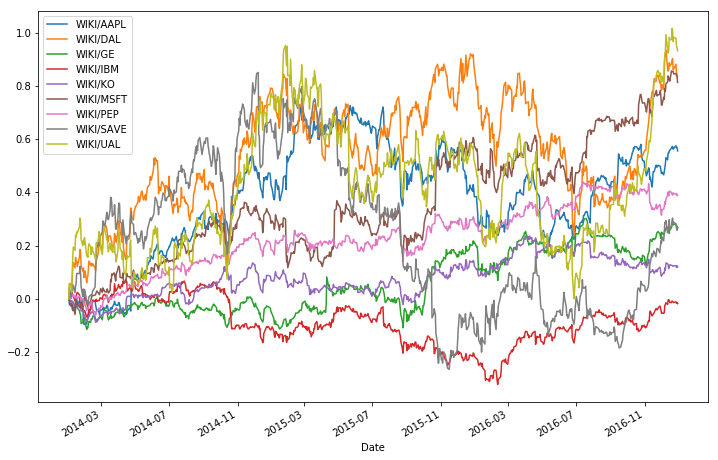

In [25]:
#Plot the cumultaive return to see how thee different stocks compare
#Nice view of how the stocks will change ypur investment over time and relative performance

cum_daily_return.plot(figsize=(12,8))
plt.legend(loc=2)

# Analyzing the Distribution of Returns

#####  Difference in distributions:

## Histograms

####  Histograms give you an overall feel for the distribution of returns. They are approximately normal in shape

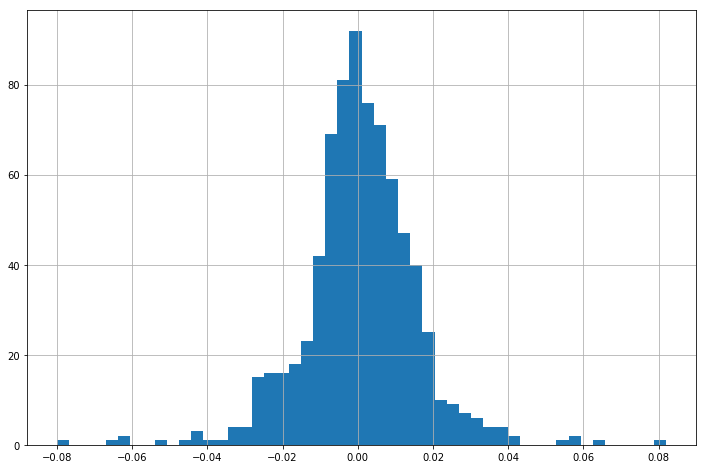

In [29]:
aapl = daily_pct_change["WIKI/AAPL"]
#number of bins the data is lumped into.
aapl.hist(bins=50, figsize=(12,8))

### Describe to get the useful statistics providing parameters such as the percentiles

##### The range (0.025 - 0.5 - 0.975) is used to formulate a 95% confidence interval which tells us that over the last n (end-start) years the daily return on 95% of the days will fall within 2.5%.value & 95%.value (the ones on the table statistics here).

In [36]:
#No paramenters vs with parameters
aapl.describe(),aapl.describe(percentiles=[0.025, 0.5, 0.975])

(count    756.000000
 mean       0.000699
 std        0.015099
 min       -0.079927
 25%       -0.006585
 50%        0.000691
 75%        0.008657
 max        0.081982
 Name: WIKI/AAPL, dtype: float64, count    756.000000
 mean       0.000699
 std        0.015099
 min       -0.079927
 2.5%      -0.028105
 50%        0.000691
 97.5%      0.030752
 max        0.081982
 Name: WIKI/AAPL, dtype: float64)

### To compare distributions of more than one stock:

##### Visualize these distributions on all stocks in a single visual by creating a matrix of histograms

##### Stock with a wider interval have higher fluctuation in returns (higher volatilty); stocks where: right skew = propensity to have larger returns during period of measurement: left skew = smaller.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124e907f0>,
      dtype=object)

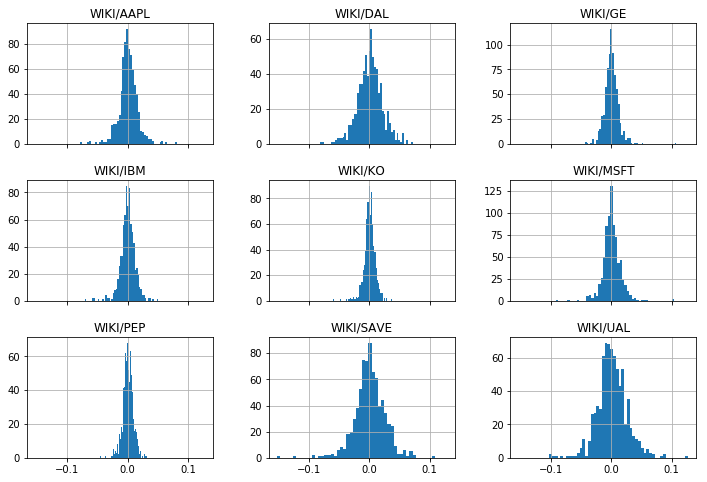

In [38]:
#sharex parameter = True tells pandas to ensure a common range of x-axis values on all of the histograms
daily_pct_change.hist(bins = 50, sharex=True, figsize=(12,8))

## Q-Q Plots

### Quantile-quantile plot, is a probability plot comparing 2 probability distributions by plotting their quantiles agaisnt each other.

##### Inside the 95% CI we can see perfect correspondance (R^2 = 1), outside there are differences in the level of correlation of distribution.

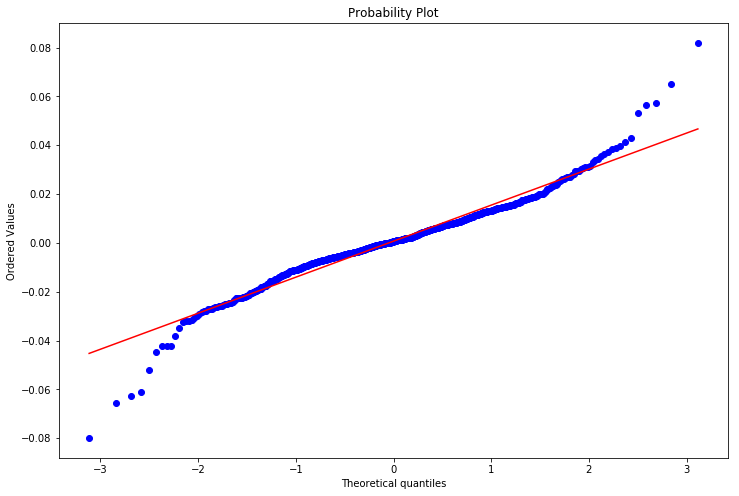

In [49]:
import scipy.stats as stats
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111) #row,col,pos
stats.probplot(aapl,dist="norm", plot=ax)
plt.show()

## Box-whisker plots

### To depict groups of data through their quartiles. 

#### The box portion represents the range form the low quantile to the high quantile and the box split by a line that represents the median value. 

#### Whiskers = a box plot may have lines extending out from both sides on the box which represent the amount of variability outside of the upper and lower quartiles.

#### The plot gives us a good performance comparison of stocks over time: the wider the box, the higher the variability and risk. The closer the median line to either side of box or longer a whisker than the other, the greater the skew of distribution.

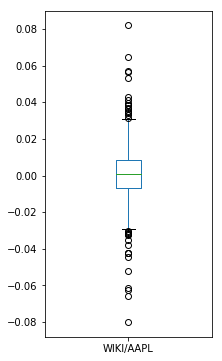

In [52]:
daily_pct_change["WIKI/AAPL"].plot(kind="box", figsize=(3,6))

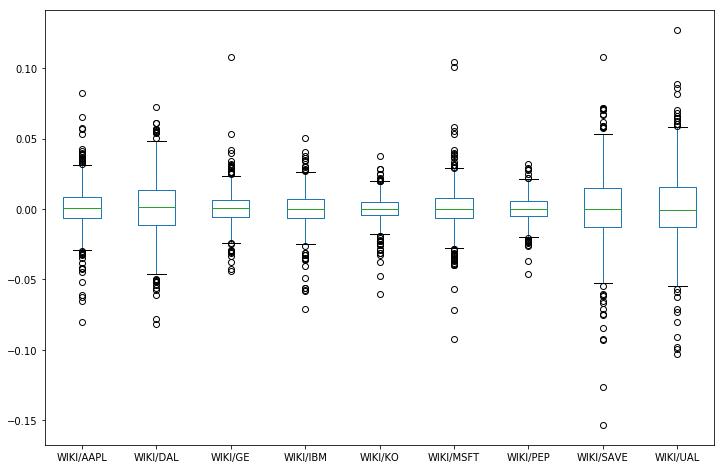

In [53]:
#For comparison
daily_pct_change.plot(kind="box", figsize=(12,8))

## Comparison of daily percentage change between stocks

#### Use of scatter plots to visualize the relationship between the rate of percentage change in prices between 2 stocks

In [62]:
def render_scatter_plot(data, x_stock_name, y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax =fig.add_subplot(111)
    #plot a scatter plot using the data[x] and data[y] coordinates
    ax.scatter(data[x_stock_name], data[y_stock_name])
    #If the x-axis limits are defined, then set them as such
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    #Vertical, horizontal and diagonal lines
    ax.vlines(0,-10,10)
    ax.hlines(0,-10,10)
    ax.plot((-10,10),(-10,10))
    #x and y labels
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

##### There seems to be a small correlation

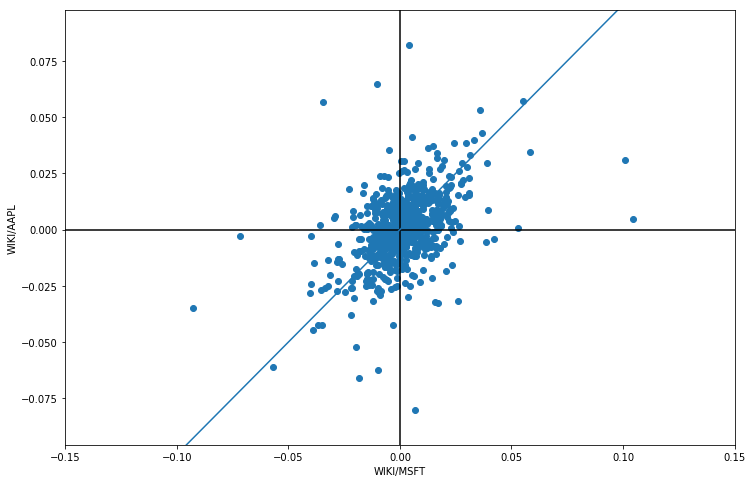

In [63]:
#Defining the variables
limits=[-0.15,0.15]
render_scatter_plot(daily_pct_change,"WIKI/MSFT", "WIKI/AAPL", xlim=limits)

##### Let's take a look at 2 other companies:

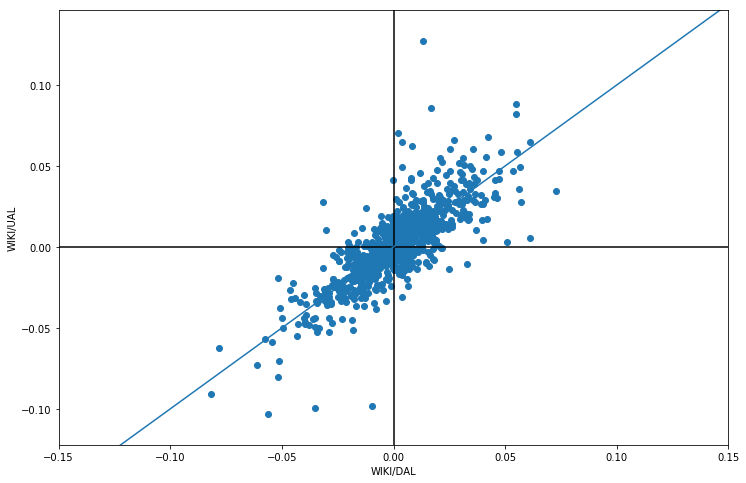

In [64]:
render_scatter_plot(daily_pct_change,"WIKI/DAL", "WIKI/UAL", xlim=limits)

#### Scatter matrix that plots all the scatters for all the combinations of stocks

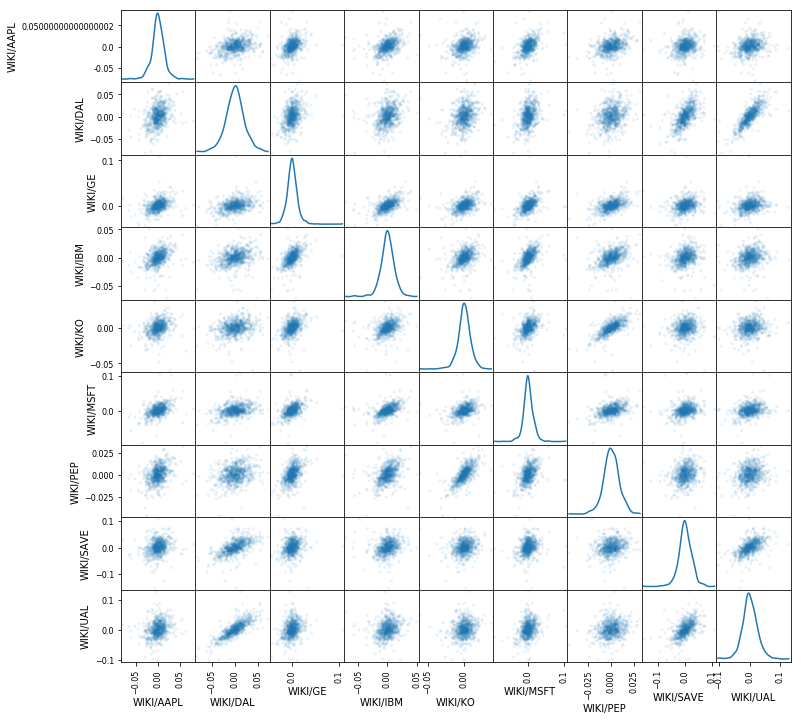

In [72]:
#All stocks against each other, with a KDE in the diagonal
#aplha=0.1 adds transparency to teh points on the graph which helps the small graphs with many overlapping points.
all_stocks = pd.plotting.scatter_matrix(daily_pct_change, diagonal = "kde", alpha=0.1, figsize=(12,12))
#kde = kernel density estimation graph => estimates distribution/represents a continuous histogram of the relationships

## Moving Windows

#### The function computes the statistic on a window of data represented by a particular period of time and then slides the window across the data by a specified interval, continually calculating the statistic as long as the window falls first within the dates of the time-series.

#### A rolling mean is usually used to smooth out short-term fluctuations and highlight longer-term trends in data.

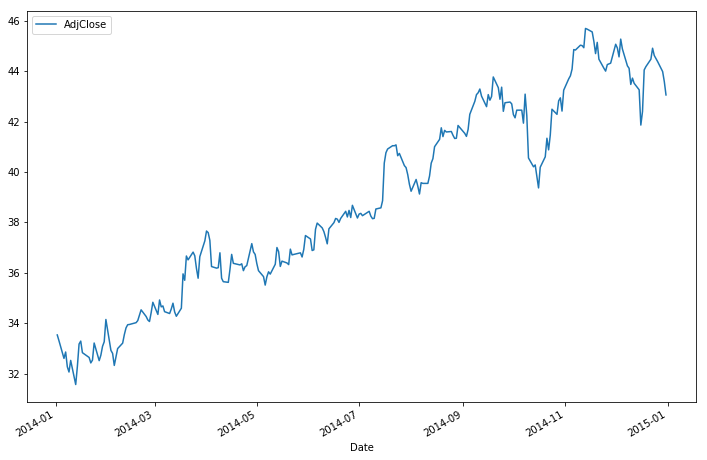

In [90]:
#Calculate rolling window on adj close of a stock:

msftAC = msft["2014"][["AdjClose"]]
sample = msftAC["2014"]
fig = sample.plot(figsize=(12,8))
fig.legend(loc=2)

In [97]:
#calculate the rollinw mean with a window of 5 periods and plot it against the raw data.
#sample.plot(figsize=(12,8))
#pd.rolling_mean(sample,5).plot(figsize=(12,8))

In [98]:
#rol_corr = pd.rolling_corr(daily_pct_change["APPL"], daily_pct_change["WIKI/MSFT"], window=252).dropna()

## Least-Squares Regression of Returns

#### To capture the change in the volatility between two investments using the ols( ) function.

$                    \Delta P_t[AAPL] = \alpha + \beta_1 * \Delta P_t[MSFT]$  

In [114]:
import statsmodels.api as sm
y = daily_pct_change["WIKI/AAPL"]
x = daily_pct_change["WIKI/MSFT"]
sm.add_constant(x)
model = sm.OLS(y,x).fit()
model

In [116]:
"""OLS HAS BEEN DEPRECATED SO WILL NEED TO LEARN IS ANOTHER WAY"""

'OLS HAS BEEN DEPRECATED SO WILL NEED TO LEARN IS ANOTHER WAY'

# Comparing Stocks to the S&P500

In [119]:
#use pct_change of the close column of sp500
sp_500_dpc = sp_500["close"].pct_change().fillna(0)
sp_500_dpc[:5]

date
2014-01-02    0.000000
2014-01-03   -0.000192
2014-01-06   -0.002870
2014-01-07    0.006142
2014-01-08    0.000218
Name: close, dtype: float64

#### Concatenate sp500 in all stocks

In [124]:
#Concatenate the results of dpc sp500  in the calculations of stocks
dpc_all = pd.concat([sp_500_dpc, daily_pct_change], axis=1)
#we want to rename the close column as sp500, {replace this:with this}
dpc_all.rename(columns={"close":"SP500"}, inplace=True)
dpc_all[:5]

,SP500,WIKI/AAPL,WIKI/DAL,WIKI/GE,WIKI/IBM,WIKI/KO,WIKI/MSFT,WIKI/PEP,WIKI/SAVE,WIKI/UAL
2014-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-01-03,-0.000192,-0.021966,0.055235,-0.000727,0.005983,-0.004919,-0.006728,0.001705,0.042278,0.058839
2014-01-06,-0.002870,0.005453,0.002053,-0.008006,-0.003429,-0.004696,-0.021132,0.000486,-0.033207,-0.014768
2014-01-07,0.006142,-0.007156,-0.017412,0.001101,0.019946,0.002980,0.007750,0.014584,0.009130,-0.017022
2014-01-08,0.000218,0.006338,0.035441,-0.002931,-0.009172,-0.011141,-0.017852,-0.002875,0.006032,0.060222


#### Cumulative Daily Returns

In [125]:
#calculate cumulative daily returns
cdr_all = (1+dpc_all).cumprod()
cdr_all[:5]

,SP500,WIKI/AAPL,WIKI/DAL,WIKI/GE,WIKI/IBM,WIKI/KO,WIKI/MSFT,WIKI/PEP,WIKI/SAVE,WIKI/UAL
2014-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2014-01-03,0.999808,0.978034,1.055235,0.999273,1.005983,0.995081,0.993272,1.001705,1.042278,1.058839
2014-01-06,0.996938,0.983367,1.057401,0.991273,1.002533,0.990408,0.972282,1.002192,1.007667,1.043202
2014-01-07,1.003061,0.976330,1.038989,0.992364,1.022530,0.993360,0.979817,1.016809,1.016867,1.025444
2014-01-08,1.003280,0.982518,1.075812,0.989455,1.013152,0.982292,0.962325,1.013886,1.023001,1.087199


#### Correlation of the daily percentage change values

In [128]:
dpc_corrs = dpc_all.corr()
dpc_corrs

,SP500,WIKI/AAPL,WIKI/DAL,WIKI/GE,WIKI/IBM,WIKI/KO,WIKI/MSFT,WIKI/PEP,WIKI/SAVE,WIKI/UAL
SP500,1.000000,0.575450,0.550782,0.723586,0.633294,0.531151,0.665072,0.613977,0.409647,0.443878
WIKI/AAPL,0.575450,1.000000,0.309006,0.367744,0.354121,0.270171,0.442434,0.360703,0.214974,0.203304
WIKI/DAL,0.550782,0.309006,1.000000,0.360285,0.294427,0.244713,0.332041,0.288344,0.578969,0.795223
WIKI/GE,0.723586,0.367744,0.360285,1.000000,0.503076,0.381810,0.454262,0.461978,0.228334,0.257898
WIKI/IBM,0.633294,0.354121,0.294427,0.503076,1.000000,0.362982,0.469845,0.397472,0.203772,0.222047
WIKI/KO,0.531151,0.270171,0.244713,0.381810,0.362982,1.000000,0.370400,0.696153,0.164852,0.171811
WIKI/MSFT,0.665072,0.442434,0.332041,0.454262,0.469845,0.370400,1.000000,0.410604,0.223751,0.287175
WIKI/PEP,0.613977,0.360703,0.288344,0.461978,0.397472,0.696153,0.410604,1.000000,0.184886,0.222030
WIKI/SAVE,0.409647,0.214974,0.578969,0.228334,0.203772,0.164852,0.223751,0.184886,1.000000,0.534214
WIKI/UAL,0.443878,0.203304,0.795223,0.257898,0.222047,0.171811,0.287175,0.222030,0.534214,1.000000


#### Extract all correlations from sp500

In [129]:
dpc_corrs.loc["SP500"]

SP500        1.000000
WIKI/AAPL    0.575450
WIKI/DAL     0.550782
WIKI/GE      0.723586
WIKI/IBM     0.633294
WIKI/KO      0.531151
WIKI/MSFT    0.665072
WIKI/PEP     0.613977
WIKI/SAVE    0.409647
WIKI/UAL     0.443878
Name: SP500, dtype: float64

 #### GE has higher corr and SAVE lowest so a plot of returns shows this as GE follows right along sp500 

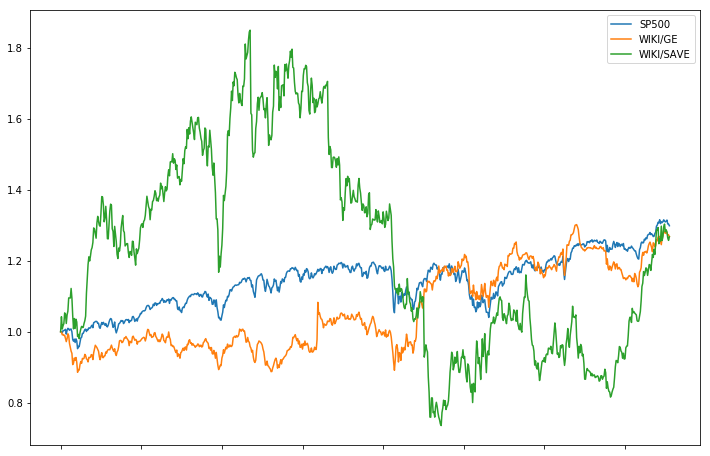

In [131]:
_ = cdr_all[["SP500", "WIKI/GE", "WIKI/SAVE"]].plot(figsize=(12,8))

#### Scatter Plot

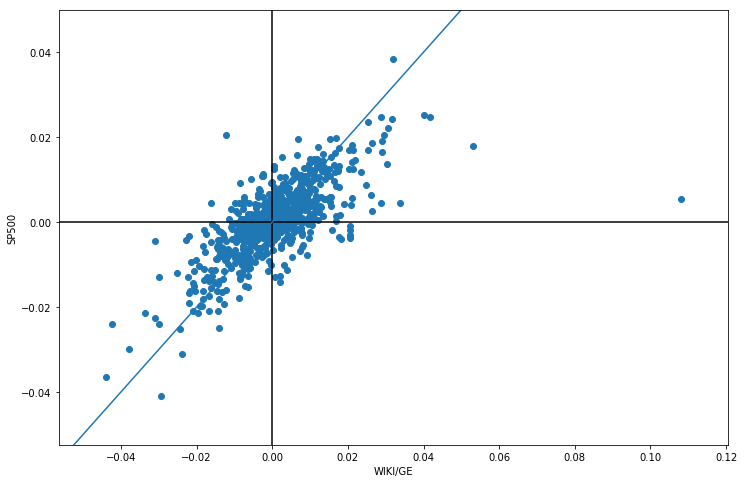

In [132]:
render_scatter_plot(dpc_all, "WIKI/GE", "SP500")
#SAVESX THE PLOT
plt.savefig("5104_05_23.png", bbox_inches="tight", dpi=300)

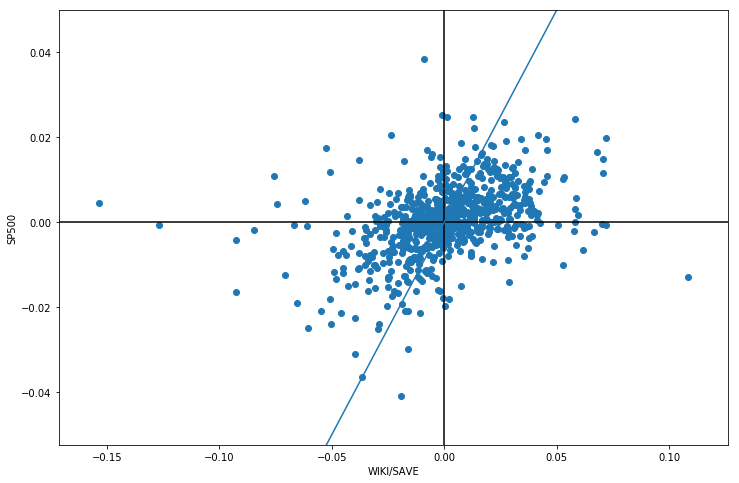

In [133]:
render_scatter_plot(dpc_all, "WIKI/SAVE", "SP500")